# Multivariate VAR Simulation

## Introduction to Multivariate VAR

While the VAR(1) model is a powerful tool for analyzing the dynamics between multiple time series variables with a single time lag, many real-world applications demand a more nuanced approach. Multivariate VAR models extend this concept by allowing for multiple time lags, capturing deeper temporal dependencies across the variables in the system. This facilitates a more detailed analysis of how past values of all variables in the system influence current values over multiple time periods.

### Multivariate VAR Process

The general formula for a multivariate VAR(p) process, where $ p $ represents the number of time lags included in the model, is:

$$ X_t = A_1 \cdot X_{t-1} + A_2 \cdot X_{t-2} + \dots + A_p \cdot X_{t-p} + \epsilon_t $$

where:
- $ X_t $ is the vector of variables at time $ t $,
- $ A_1, A_2, \dots, A_p $ are the matrices of coefficients for each lag,
- $ \epsilon_t $ is the vector of error terms, assumed to be normally distributed with mean 0 and a specific standard deviation.

### Handling in `VARsim.py`

The `VARsim.py` script implements multivariate VAR simulation through its advanced methods, accommodating multiple lags and thus enabling the simulation of complex dynamic systems. The script allows for specifying a series of coefficient matrices for each lag, generates simulated time series data based on these parameters, and includes specialized plotting functions to visualize the dynamics between variables across time lags.

### Notebook Structure

This notebook will guide you through simulating multivariate VAR models using the `VARsim.py` script. We will demonstrate how to specify model parameters, generate simulated data, and visualize the results to analyze the interactions and dynamics among multiple time series variables.

### Objective

Our objective is to simulate and analyze the dynamics of multivariate VAR models. By leveraging the `VARsim.py` script, we aim to understand the influence of past values on current system states through multivariate time series simulation and visualization.


### Example Usage

While the detailed implementation for multivariate VAR simulation in `VARsim.py` might be complex, an example usage scenario could involve specifying multiple coefficient matrices for each lag and using a dedicated method to generate and analyze the simulated data. The following code examples demonstrate a simplified example of how to use the `VARsim.py` script to simulate multivariate VAR models:

In [1]:
import sys
sys.path.append("../../")
sys.path.append("../../BVAR")

In [2]:
from BVAR.VARsim import *

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


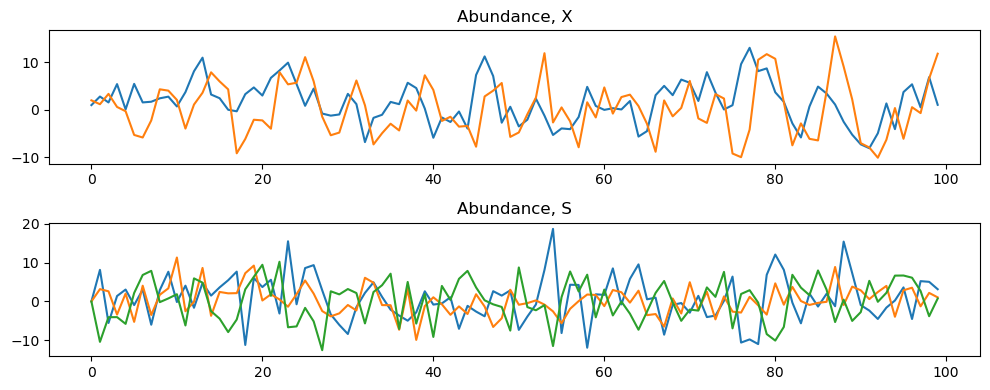

n_obs: 100
coefficients: [[ 0.8 -0.2]
 [ 0.3  0.5]]
initial_values: [[1]
 [2]]
noise_stddev: 4.0
output: show
data: [[ 1.00000000e+00  2.00000000e+00]
 [ 2.80660459e+00  1.18620470e+00]
 [ 1.56152647e+00  3.36549227e+00]
 [ 5.42565085e+00  6.10640719e-01]
 [ 1.02711545e-01 -2.90317745e-01]
 [ 5.47414708e+00 -5.29088673e+00]
 [ 1.56688522e+00 -5.83014996e+00]
 [ 1.70997702e+00 -2.23404979e+00]
 [ 2.43065311e+00  4.32996544e+00]
 [ 2.78237128e+00  4.04806396e+00]
 [ 7.17717406e-01  2.09274097e+00]
 [ 3.73494084e+00 -3.94919423e+00]
 [ 8.13597018e+00  1.11178861e+00]
 [ 1.10032412e+01  3.60581086e+00]
 [ 3.22976846e+00  7.90912337e+00]
 [ 2.45027469e+00  5.99186226e+00]
 [ 1.66243963e-02  4.31545431e+00]
 [-3.07347756e-01 -9.16154493e+00]
 [ 3.30789776e+00 -6.13654800e+00]
 [ 4.72447565e+00 -2.08656582e+00]
 [ 3.01696871e+00 -2.22496350e+00]
 [ 6.74953612e+00 -3.97638121e+00]
 [ 8.29001667e+00  7.95282912e+00]
 [ 9.94825880e+00  5.37636725e+00]
 [ 5.42889057e+00  5.71832421e+00]
 [ 8.5150

In [3]:
# Simulating a multivariate VAR(1) process using the VARSimulator class and parameters specified in the script

n_obs = 100
nX = 2
A = np.array([[0.8, -0.2], [0.3, 0.5]])
X0 = np.array([1, 2]).reshape((2, 1))
nS = 3
# B = np.array([[0, 0], [0.3, 0.5]])
B = np.zeros((nS, nX))
B[0, 1] = 0.8
B[2, 1] = -0.5
# print(B)
S0 = np.zeros(nS).reshape((nS, 1))
simulator = VARSimulator(n_obs=n_obs, coefficients=A,
                         initial_values=X0, noise_stddev=4.0, output='show')
simulator.run("MVARsim", coefficientsM=B, initial_valuesM=S0)

simulator.print_parameters()

We can do the same but using parameters specified in json file:

```json
{
    "n_obs": 97,
    "coefficients": [
        [
            0.8,
            -0.2,
            0.3
        ],
        [
            0.3,
            0.5,
            -1.0
        ],
        [
            0.2,
            -0.1,
            0.4
        ]
    ],
    "initial_values": [
        [
            1
        ],
        [
            2
        ],
        [
            0
        ]
    ],
    "noise_stddev": 1.2,
    "output": "both"
}
```

```JSON
{
    "coefficientsM": [
        [
            0.0,
            -0.5,
            0.0
        ],
        [
            0.1,
            0.1,
            -0.1
        ],
        [
            -0.2,
            0.1,
            0.3
        ]
    ],
    "initial_valuesM": [
        [
            2
        ],
        [
            0
        ],
        [
            0
        ]
    ]
}
```

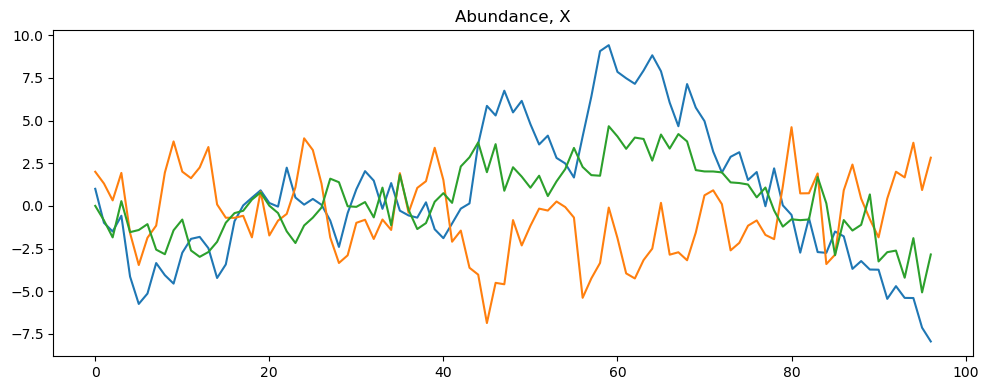

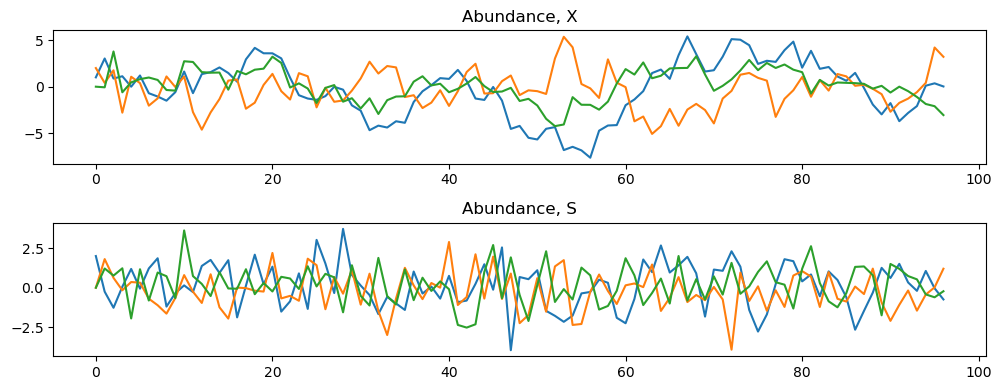

In [4]:
parametersX = read_parameters('parameters2.json')
simulator = VARSimulator(**parametersX)
simulator.run("VARsim")

parametersS = read_parameters('parametersS.json')

simulator.run("MVARsim", **parametersS)

We can also use the `make_plot_stacked` method to plot the simulated data in a stacked format and with a heatmap.

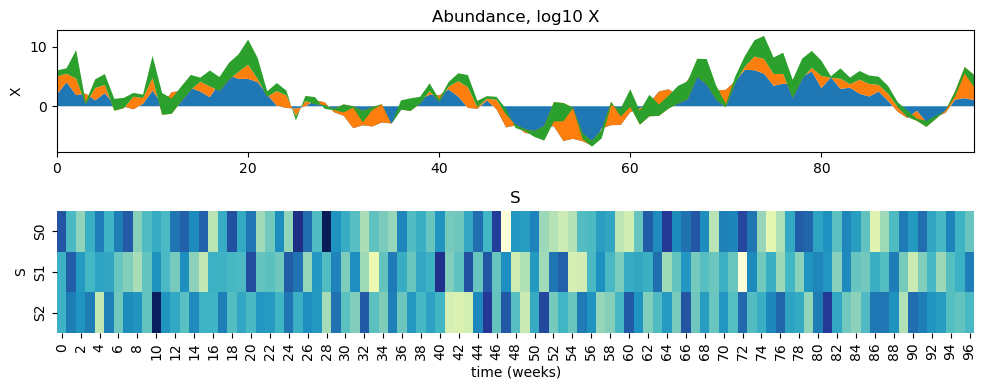

In [5]:
# Call the make_plot_stacked() method
make_plot_stacked(simulator.data, simulator.dataM)